## CCNSS 2018 Module 3: Reinforcement learning and planning
# Tutorial 1: Value estimation during classical conditioning using TD-learning



# **Introduction **

In this tutorial, we will learn how to estimate state-value functions in a classical conditioning paradigm using Temporal Difference (TD) learning and examine TD-errors at the presentation of the conditioned and unconditioned stimulus (CS and US) under different CS-US contingencies.

__Environment:__

- The classical conditioning environment is composed of a sequence of states that the agent deterministically transitions through. 
- The agent experiences the environment in episodes or trials. 
- Episodes terminate by transitioning to the inter-trial-interval (ITI) state and they are initiated from the ITI state as well. We clamp the value of the terminal/ITI states to zero. 
- Within each episode, the agent is presented a CS and US (reward). 
- For each exercise, we use a different CS-US contingency. 
- The goal of the agent is to learn to predict expected rewards from each state in the trial. 


__Definitions:__

1. Returns: 
\begin{align}
G_{t} = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + ... = \sum \limits_{k = 1}^{\infty} \gamma^{k-1} r_{t+k}
\end{align}

2. Value: 
\begin{align}
V(s_{t}) = \mathbb{E} [ G_{t} | s_{t}] = \mathbb{E} [r_{t+1} + \gamma V_{t+1} | s_{t}] 
\end{align}

3. TD-error:
\begin{align}
\delta_{t} = r_{t+1} + \gamma V(s_{t+1}) - V(s_{t})
\end{align}

4. Value updates:
\begin{align}
V(s_{t}) \leftarrow V(s_{t}) + \alpha \delta_{t}
\end{align}


**Run the following code for your implementation:**

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [2]:
class classical_conditioning():
    
    def __init__(self, n_steps):
        
        # Task variables
        self.n_steps = n_steps 
        self.n_actions = 0
        
        # Reward variables
        self.reward_state = [0,0]
        self.reward_magnitude = reward_magnitude
        self.reward_probability = reward_probability
        self.reward_time = reward_time
        
        # Time step at which the conditioned stimulus is presented
        self.cs_time = int(n_steps/4) - 1

        # Create a state dictionary
        self.create_state_dictionary()
    
    def define_reward(self, reward_magnitude, reward_time):
        
        """
        Determine reward state and magnitude of reward
        """
        if reward_time >= self.n_steps - self.cs_time:
            self.reward_magnitude = 0
        
        else:
            self.reward_magnitude = reward_magnitude
            self.reward_state = [1, reward_time]
            
    def get_outcome(self, current_state, action = 0):
    
        """
        Determine next state and reward
        """
        # Update state
        if current_state < self.n_steps - 1: 
            next_state = current_state + 1
        else:
            next_state = 0
            
        # Check for reward
        if self.reward_state == self.state_dict[current_state]:
            reward = self.reward_magnitude
        else:
            reward = 0
        
        return next_state, reward
    
    def create_state_dictionary(self):
        
        """
        This dictionary maps number of time steps/ state identities
        in each episode to some useful state attributes:
        
        state      - 0 1 2 3 4 5 (cs) 6 7 8 9 10 11 12 ...
        is_delay   - 0 0 0 0 0 0 (cs) 1 1 1 1  1  1  1 ...
        t_in_delay - 0 0 0 0 0 0 (cs) 1 2 3 4  5  6  7 ...
        """
        d = 0

        self.state_dict = {}
        for s in range(self.n_steps):
            if s <= self.cs_time:
                self.state_dict[s] = [0,0]
            else: 
                d += 1 # Time in delay           
                self.state_dict[s] = [1,d]
                

### Unless specified otherwise, use the following parameter values:

In [3]:
reward_time = 10
reward_magnitude = 10
reward_probability = 1

n_trials = 20000
n_steps = 40

gamma = 0.98  # temporal discount factor
alpha = 0.001 # learning rate

---

# **Exercise 1:**

Implement TD-learning to estimate the state-value function in the classical-conditioning world with guaranteed rewards, with a fixed magnitude, at a fixed delays after the CS. Save the history of estimated value function and TD-errors over learning.

1. Plot TD-errors on an example trial before learning.
2. Plot the estimated value function for each state after learning has converged.
3. Plot the value function and TD-errors over learning.

In [7]:
env  = classical_conditioning(n_steps)
env.define_reward(reward_magnitude, reward_time)

V = np.zeros(n_steps)
PRE = np.zeros((n_steps, n_trials))

for n in range(n_trials):
    
    state = 0
    
    for t in range(n_steps):
        
        next_state, reward = env.get_outcome(state)
        is_delay = env.state_dict[state][0]
        
        PRE[state, n] = reward + gamma * V[next_state] - V[state]
        V[state] += alpha * PRE[state, n] * is_delay
        
        state = next_state

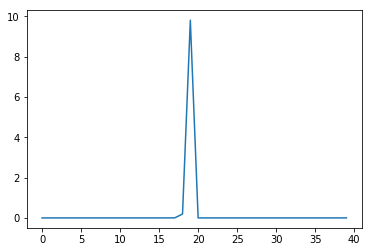

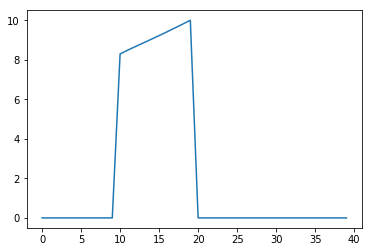

In [16]:
env.state_dict
plt.plot(PRE[:, ])
plt.show()
plt.plot(V)

# **Exercise 2:**

Implement TD-learning in the context of rewards of varying magnitudes. Use a set of discrete reward magnitudes. On each trial, randomly select a reward from the specified set. 
1. Plot TD-errors on a set of trials before learning, as many as the number of reward magnitudes. On each trial present a different reward magnitude. Overlay the TD-errors on these set of trials on the same plot.
2. Plot the estimated state-value function for each state after learning has converged.
3. Plot TD-errors on a set of trials, on for each reward magnitude (as in (1)), after learning has converged.



In [17]:
reward_magnitudes = [10, 6, 4, 1]

In [32]:



V = np.zeros(n_steps)
PRE = np.zeros((n_steps, n_trials))

rm_chooser = 0

for n in range(n_trials):
    
    state = 0

    env  = classical_conditioning(n_steps)

    #env.define_reward(reward_magnitudes[int(np.random.random()*4)], reward_time)
    env.define_reward(reward_magnitudes[rm_chooser], reward_time)
    
    for t in range(n_steps):
        
        next_state, reward = env.get_outcome(state)
        is_delay = env.state_dict[state][0]
        
        PRE[state, n] = reward + gamma * V[next_state] - V[state]
        V[state] += alpha * PRE[state, n] * is_delay
        
        state = next_state
        
    rm_chooser = (rm_chooser+1)%4

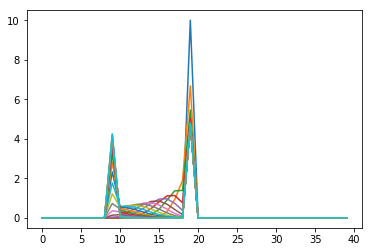

In [33]:
n_trials = 20000
for i in range(n_trials//1000):
    plt.plot(PRE[:,int(i*1000)])

# **Exercise 3: **

Implement TD-learning in the context of probabilistic rewards. For a fixed probability of reward delivery ($P(r) < 1$), on each trial randomly determine whether or not to present a reward on that trial. Keep reward magnitude constant.
1. Plot the estimated value function after learning.
2. Plot TD-errors on a trial with reward delivered and one with reward omitted, after learning. Overlay the two on the same plot.
3. Repeat (1) and (2) for different probabilities of reward delivery. How does the value function and TD-errors change for different probabilities of reward delivery?

In [34]:
reward_probabilities = [0.1, 0.4, 0.6, 0.9]

In [0]:
for rp in reward_probabilities:
    
    env  = classical_conditioning(n_steps)
    env.define_reward(reward_magnitude, reward_time)

    V = np.zeros(n_steps)
    PRE = np.zeros((n_steps, n_trials))

    for n in range(n_trials):

        state = 0

        for t in range(n_steps):

            next_state, reward = env.get_outcome(state)
            is_delay = env.state_dict[state][0]

            PRE[state, n] = reward + gamma * V[next_state] - V[state]
            V[state] += alpha * PRE[state, n] * is_delay

            state = next_state

# **Exercise 4:**

Implement TD-learning in the context of rewards presented at variable delays since CS. Use a set of discrete times since CS. On each trial, randomly select the delay between CS ans US. 

1. Plot TD-errors on a set of trials before learning, as many as the number of CS-US delays. On each trial present a different delay between the CS and reward (US). Overlay the TD-errors on these set of trials on the same plot. 
2. Plot the estimated state value function after learning. 
3. Plot TD-errors on a set of trials, one for each delay duration, after learning. 
4. Implement (1) to (3) in the context of probabilitic rewards ($P(r) < 1$). On each trial, randomly select the delay between CS-US and whether or not to present a reward on that trial. How do TD-errors change when the reward probability is changed?


In [1]:
# Start by using: reward_times = [10 20]
# Once you think you understand why the estimated value function looks the way it does,
# then try reward_times = np.arange(10,21,3) and reward_times = np.arange(10,21,1)

In [0]:
reward_probabilities = [0.1, 0.4, 0.6, 0.9, 1]

# **Exercise 5: **

In this exercise we will implement a commonly used heuristic used in modeling activity of dopamine neurons, TD-reset. 
Implement TD-learning as in previous exercises, but set TD-error to zero on all steps after reward (US). 

1. Plot value function and TD-errors. 
2. Can you explain how the reset is changing the TD-errors and value function?
3. How do they change if rewards are probabilistic ($P(r) < 1$)? 

In [ ]:
reward_times = np.arange(10,21,1)
reward_probabilities = [0.1, 0.4, 0.6, 0.9, 1]

# **Exercise 6:**

Implement Exercise 5, after making the following small change: instead of resetting the TD-error, set the next_state after reward delivery as the ITI state, irrespective of the time of reward. 

1. Compare value functions and TD-errors in Exercise 5 with those using the modified environment. 
2. Can you explain the differences in these two cases?
3. How does this change in the state representation compare with the reset we introduced in Exercise 4 in terms of our interpretation regarding how an agent understand the classical conditioning paradigm?



In [4]:
reward_times = np.arange(10,21,1)
reward_probabilities = [0.1, 0.4, 0.6, 0.9, 1]

## Are you done?

Awesome! In that case, ask me and I will point you to an interesting paper to read. Given these results, you can evaluate the main claims in that paper with a more critical eye! 